In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
import seaborn as sns


In [5]:
data = pd.read_csv('data.csv')

In [10]:
# data.head()
#x = data.drop('id',axis = 1)
x = data.drop('Unnamed: 32',axis = 1)
x.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
x.head()
x = x.drop('id',axis = 1)
x.shape

(569, 31)

In [12]:
y = x['diagnosis']
x.drop('diagnosis',axis  =1,inplace=True)

In [15]:
x.shape
y.shape

(569,)

In [16]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [30]:
x.isnull().sum().sum()

0

In [31]:
y.isnull().sum().sum()

0

In [18]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [69]:
x.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [25]:
list1 = ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
  'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']
for i in list1:
    print(x[i].describe())

count    569.000000
mean       0.405172
std        0.277313
min        0.111500
25%        0.232400
50%        0.324200
75%        0.478900
max        2.873000
Name: radius_se, dtype: float64
count    569.000000
mean       1.216853
std        0.551648
min        0.360200
25%        0.833900
50%        1.108000
75%        1.474000
max        4.885000
Name: texture_se, dtype: float64
count    569.000000
mean       2.866059
std        2.021855
min        0.757000
25%        1.606000
50%        2.287000
75%        3.357000
max       21.980000
Name: perimeter_se, dtype: float64
count    569.000000
mean      40.337079
std       45.491006
min        6.802000
25%       17.850000
50%       24.530000
75%       45.190000
max      542.200000
Name: area_se, dtype: float64
count    569.000000
mean       0.007041
std        0.003003
min        0.001713
25%        0.005169
50%        0.006380
75%        0.008146
max        0.031130
Name: smoothness_se, dtype: float64
count    569.000000
mean       0.0

In [23]:
x['radius_se'].describe()

count    569.000000
mean       0.405172
std        0.277313
min        0.111500
25%        0.232400
50%        0.324200
75%        0.478900
max        2.873000
Name: radius_se, dtype: float64

In [68]:
# list2 = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
#        'smoothness_mean', 'compactness_mean', 'concavity_mean',
#        'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
#        'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
#        'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
#        'fractal_dimension_se', 'radius_worst', 'texture_worst',
#        'perimeter_worst', 'area_worst', 'smoothness_worst',
#        'compactness_worst', 'concavity_worst', 'concave points_worst',
#        'symmetry_worst', 'fractal_dimension_worst']
# for i in list2:
#     print(x[i].value_counts().value_counts(),end ="    ")

In [36]:
from sklearn.preprocessing import LabelEncoder
coder = LabelEncoder()
y = coder.fit_transform(y)


1

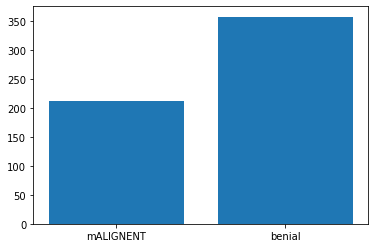

In [62]:
cancer = ['mALIGNENT','benial']
values = [212,357]
#y.value_counts()
plt.bar(cancer,values)
plt.show()

In [115]:
from sklearn.preprocessing import MinMaxScaler

In [92]:
x_mean = list(data.columns[2:12])
x_se = list(data.columns[12:22])
x_worst = list(data.columns[22:32])
#x_worst = 

In [97]:
x[x_mean].corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


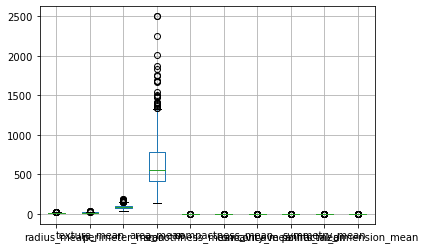

In [105]:
#plt.figure((40,40)

x[x_mean].boxplot()

In [106]:
x[x_mean].describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


In [118]:
scale = MinMaxScaler()
scaling = ['perimeter_mean','area_mean']

scale.fit(x[x_mean])
#scale.transform(x[['perimeter_mean']])
scale.transform(x[x_mean])

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.73111332, 0.68636364,
        0.60551811],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.34875746, 0.37979798,
        0.14132266],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.63568588, 0.50959596,
        0.21124684],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.26351889, 0.26767677,
        0.13732098],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.7554672 , 0.67525253,
        0.42544229],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.26616162,
        0.18702612]])

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score

In [121]:
xtrain,xtest,yrain,ytest = train_test_split(x[x_mean],y,test_size = .20,random_state= 42)

In [146]:
log = LogisticRegression(solver = 'lbfgs',max_iter=150)
log.fit(xtrain,yrain)
ypred = log.predict(xtest)
accuracy_score(ypred,ytest)

0.9298245614035088

In [144]:
cross_val_score(log,xtrain,yrain,cv=7).mean()

0.9076923076923078

In [147]:
log?

In [154]:
from sklearn.model_selection import GridSearchCV
dic = {'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
       'multi_class' : ['auto', 'ovr', 'multinomial'],'max_iter' : [127,150,190]}

In [157]:
check = GridSearchCV(log,dic,n_jobs = 5)
check.fit(xtrain,yrain)

GridSearchCV(estimator=LogisticRegression(max_iter=150), n_jobs=5,
             param_grid={'max_iter': [127, 150, 190],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [158]:
check.best_score_

0.9384615384615385

In [161]:
check.best_estimator_

LogisticRegression(max_iter=127, penalty='none', solver='newton-cg')

In [164]:
ypred = check.predict(xtest)
accuracy_score(ypred,ytest)

0.9473684210526315